# WHAT TO DO
- 번역 추론 결과물을 얻는 시간을 최적화

# WHAT I DID
1. 원본 리뷰 데이터 전처리: 중복을 최대한 제거하여 총 추론 생성 시간 단축
2. 데이터 분포 확인: 추론 데이터 분배를 위한 확인
3. 각 pc에서 추론 시간 비교: desktop, mini-pc, iMac

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")  # 기본 테마 설정 (다른 옵션: darkgrid, white, dark, ticks)

[결과1] 원본 리뷰 데이터 전처리

In [ ]:
origin_review_df = pd.read_csv("../artifact/medallion/bronze/olist/olist_order_reviews_dataset.csv")
print("Size of original reviews:", origin_review_df.shape)

pp_review_df = pd.read_csv("../artifact/preprocess/order_reviews.csv")
print("Size of preprocessed reviews:", pp_review_df.shape)

Size of original reviews: (99224, 7)
Size of preprocessed reviews: (42590, 3)


[결과2] 데이터 분포 확인

In [6]:
all_df = pd.read_csv("../artifact/preprocess/all_portuguess.txt", header=None)
all_df.rename(columns={0: "Portuguess"}, inplace=True)
print(all_df.shape)
print(all_df.dropna().shape)

(38103, 1)
(38103, 1)


# Pandasd에서 NaN 처리
- pandas에서는 기본적으로 n/a, NA, N/A, 등과 같은 문자열을 **NaN**으로 자동으로 인식하고 처리합니다.
- 이는 read_csv()나 read_excel() 등에서 **누락된 값 (missing value)**을 나타내는 값으로 처리되기 때문입니다.

---
## 해결 방법 1: na_values 옵션 사용
- read_csv() 또는 read_excel()에서 na_values 옵션을 사용하여 특정 문자열을 **NaN**으로 인식하지 않도록 할 수 있습니다.
- 이 옵션을 사용하면 **n/a**를 None으로 읽지 않도록 설정할 수 있습니다.
- 예를 들어, n/a를 None으로 인식하지 않게 하려면 na_values를 조정할 수 있습니다.

```python
import pandas as pd

# n/a를 NaN으로 인식하지 않게 처리
df = pd.read_csv('파일경로.csv', na_values=["n/a", "N/A", "na"])

print(df)
```
---
## 해결 방법 2: keep_default_na=False 사용
- pandas의 read_csv()에서 keep_default_na=False를 설정하면 기본적으로 n/a와 같은 값들을 **NaN**으로 처리하지 않게 할 수 있습니다.

```python
import pandas as pd

# 'n/a'를 NaN으로 변환하지 않도록 설정
df = pd.read_csv('파일경로.csv', keep_default_na=False)

print(df)
```

In [8]:
# 2번 방법으로 해결
all_df = pd.read_csv("../artifact/preprocess/all_portuguess.txt", header=None, keep_default_na=False)
all_df.rename(columns={0: "Portuguess"}, inplace=True)
print(all_df.shape)
print(all_df.dropna().shape)

(38103, 1)
(38103, 1)


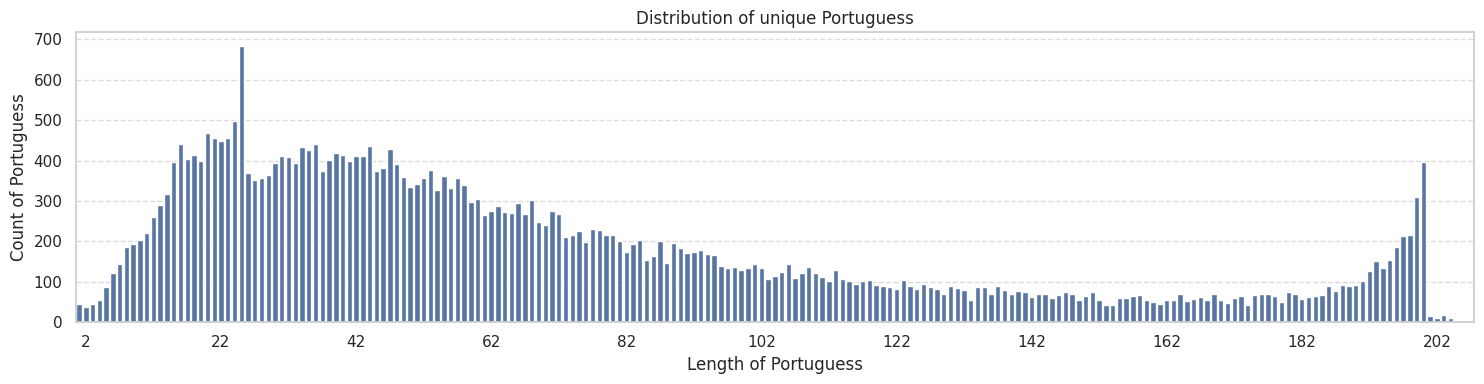

In [58]:
col = "Portuguess"
all_df['len'] = all_df[col].str.len()
data_to_plot = all_df.groupby('len').count()

plt.figure(figsize=(15, 4))
sns.barplot(x=data_to_plot.index, y=col, data=data_to_plot)
plt.title(f"Distribution of unique {col}")
plt.xlabel(f'Length of {col}')
plt.ylabel(f'Count of {col}')
plt.xticks(rotation=0)
if len(data_to_plot) > 40:
    plt.xticks(range(all_df['len'].min(), all_df['len'].max(), 20))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

이 후 `./inference/preprocess.py`로 전처리 후 번역 수행